In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data_640_validated.csv", encoding='latin1')
df
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm
from tqdm.notebook import tqdm
player_df= pd.read_csv('data_640_validated.csv', encoding='latin1')




In [35]:
df.isnull().sum()

Unnamed: 0    0
ï..O1         0
A1_1          0
A1_2          0
A2            0
             ..
F28           0
F29           0
F30           0
F31           0
F32           0
Length: 96, dtype: int64

In [36]:
# Data Type
data_types = df.dtypes
print("Data Types:")
print(data_types)
# Number of Unique Values
unique_values_count = df.nunique()
print("Number of Unique Values:")
print(unique_values_count)


# Outliers
# Range (Percentiles)
percentiles = df.describe(percentiles=[0.25, 0.5, 0.75])
print("Percentiles:")
print(percentiles)


# Check for outliers (Assuming numerical columns)
numerical_columns = df.select_dtypes(include=[np.number]).columns
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

print("Outliers:\n", outliers)

# Number of Special Values
# Example: Counting occurrences of a specific value
special_value_count = df['A2'].value_counts()
print("Number of Special Values in A2:")
print(special_value_count)


# Number of Special Values (e.g., 'N/A', 'Unknown')
special_values = df.apply(lambda x: x.isin(['N/A', 'Unknown'])).sum()
print("Number of Special Values:")
print(special_values)
special_values






Data Types:
Unnamed: 0     int64
ï..O1         object
A1_1          object
A1_2          object
A2            object
               ...  
F28            int64
F29            int64
F30            int64
F31            int64
F32            int64
Length: 96, dtype: object
Number of Unique Values:
Unnamed: 0    640
ï..O1         580
A1_1          110
A1_2            4
A2              2
             ... 
F28             5
F29             5
F30             5
F31             5
F32             5
Length: 96, dtype: int64
Percentiles:
       Unnamed: 0          C1          C2          C3          C4          C5  \
count  640.000000  640.000000  640.000000  640.000000  640.000000  640.000000   
mean   320.500000    3.784375    2.987500    4.100000    2.700000    4.334375   
std    184.896367    0.941350    1.076059    0.869947    1.049927    0.858032   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%    160.750000    3.000000    2.000000    4.000000    2.000000

Unnamed: 0    0
ï..O1         0
A1_1          0
A1_2          0
A2            0
             ..
F28           0
F29           0
F30           0
F31           0
F32           0
Length: 96, dtype: int64

## 1. Data Quality Investigation:
### Completeness:

In [37]:
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()

# Check for missing records
missing_records = df[df.isnull().any(axis=1)]

# Check for exact duplicates
exact_duplicates = df[df.duplicated()]

# Check for granularity
granularity_issues = df.groupby(['A3']).count()  # Replace '...' with an appropriate column for granularity check

# Check for coverage
coverage_issues = df[df['A3'].isnull()]  # Replace '...' with an appropriate column for coverage check

# Print results
print("Missing Values:\n", missing_values)
print("\nMissing Records:\n", missing_records)
print("\nExact Duplicates:\n", exact_duplicates)
print("\nGranularity Issues:\n", granularity_issues)
print("\nCoverage Issues:\n", coverage_issues)





# Checking accuracy
# You may want to visualize extreme values, unusual category names, and check for typos
# For example, print(df['A1_1'].value_counts()) to check unique values in the 'A1_1' column

# Checking consistency
# You might need to check if data format is consistent, handle functional dependencies, etc.

# Handle missing values
# You can choose to drop, impute, or handle missing values based on the context
# Example: df = df.dropna()  # Drop rows with missing values

# Handle duplicates
# Example: df = df.drop_duplicates()

df['A5'] = pd.to_numeric(df['A5'], errors='coerce')


import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame

# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(exclude='number').columns

# Handling missing values for numeric columns (fill with mean)
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Handling missing values for categorical columns (fill with most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])





Missing Values:
 Unnamed: 0    0
ï..O1         0
A1_1          0
A1_2          0
A2            0
             ..
F28           0
F29           0
F30           0
F31           0
F32           0
Length: 96, dtype: int64

Missing Records:
      Unnamed: 0            ï..O1                          A1_1       A1_2  \
21           29   5/16/2020 9:10                       Vietnam       Asia   
33          609  5/30/2020 16:25                      Filipino       Asia   
36          158   5/21/2020 6:13                           USA  US/Canada   
51          537  5/25/2020 23:35  Citizen of the United States  US/Canada   
53            9   5/16/2020 0:36                       Vietnam       Asia   
..          ...              ...                           ...        ...   
617         606   5/30/2020 4:15                           USA  US/Canada   
622         607   5/30/2020 4:19                           USA  US/Canada   
626         453  5/25/2020 10:10                      American  US/Can

### Accuracy:


In [38]:
# Check for extreme values
extreme_values = df[(df['C5'] > 4) | (df['C5'] < 2)]



# Print results
print("\nExtreme Values:\n", extreme_values)
#print("\nUnusual Category Names:\n", unusual_category_names)
#print("\nNoise Issues:\n", noise_issues)
#print("\nMisspelling Issues:\n", misspelling_issues)






extreme_values = df.describe(percentiles=[0.01, 0.99])
print("Extreme values:")
print(extreme_values)


# Data Quality Check - Unusual Category Names
categorical_columns = ['A1_1', 'A1_2', 'B1', 'B2', 'B3']  # Adjust based on your categorical columns
unusual_category_names = df[categorical_columns].apply(lambda x: x[~x.isin(['Very worried'])])
print("\nUnusual Category Names:")
print(unusual_category_names)

# Data Quality Check - Wrong Data Type
wrong_data_type_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print("\nWrong Data Type:")
print(wrong_data_type_columns)


Extreme Values:
      Unnamed: 0            ï..O1               A1_1       A1_2      A2  \
0         598.0   5/29/2020 8:11          Filipino        Asia    Male   
1         230.0   5/23/2020 1:54           American  US/Canada    Male   
2         232.0   5/23/2020 2:01           American  US/Canada    Male   
4         231.0   5/23/2020 2:00  Mexican American   US/Canada    Male   
6          84.0   5/21/2020 0:34           British          EU    Male   
..          ...              ...                ...        ...     ...   
629       483.0  5/25/2020 15:08           American  US/Canada  Female   
630       309.0   5/25/2020 1:48           American  US/Canada  Female   
632       274.0  5/24/2020 23:02            British         EU  Female   
634       328.0   5/25/2020 4:48      United States  US/Canada  Female   
636       416.0   5/25/2020 7:29           American  US/Canada  Female   

                             A3     A4    A5                  A6  \
0              Secondary 

### Consistency

In [39]:
# Check for different data formats
#format_issues = df[df['C5'].apply(lambda x: not x.isdigit())]

# Check for inconsistent granularity
inconsistent_granularity = df.groupby(['C5']).count()  # Replace '...' with an appropriate column for granularity check

# Check for inconsistent units
inconsistent_units = df[df['C5'] != 3]  # Replace '...' with an appropriate column for unit check

# Print results
#print("\nFormat Issues:\n", format_issues)
print("\nInconsistent Granularity:\n", inconsistent_granularity)
print("\nInconsistent Units:\n", inconsistent_units)





# Data consistency check
# For consistency, let's check for inconsistent data format in the 'B2' column
inconsistent_data_format_B2 = df[~df['B2'].str.isdigit()]  # Replace 'B2' with the actual column name
print("\nInconsistent Data Format in B2:")
print(inconsistent_data_format_B2)


# Check for consistency in data format and wrong data type
print("Unique Values:")
print(df.nunique())

# Check for consistency in data format
print("Value Counts:")
for column in df.columns:
    print(df[column].value_counts())

# Check for consistency in data format
print("Categorical Variable Value Counts:")
categorical_columns = ['A1_1', 'A1_2', 'A2', 'A3', 'A4', 'A6', 'A7', 'A8', 'B1', 'B2', 'B3']
for column in categorical_columns:
    print(df[column].value_counts())

# Check for consistency in data format
print("Consistency in Data Format:")
for column in df.columns:
    if df[column].apply(lambda x: isinstance(x, str)).all():
        print(f"{column} has consistent data format.")
    else:
        print(f"{column} has inconsistent data format.")

# Check for consistency in data format and inconsistency in units
print("Consistency in Units:")
print(df['D3'].unique())  # Assuming D3 is a column representing game playing frequency
print(df['D4'].unique())  # Assuming D4 is a column representing average hours spent playing the game

# Check for consistency in data format
print("Consistency in Data Format (Likert Scale):")
likert_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']
for column in likert_columns:
    print(df[column].unique())

# Check for consistency in data format
print("Consistency in Data Format (Ordinal Scale):")
ordinal_columns = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16',
                    'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'F1', 'F2', 'F3',
                    'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18',
                    'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32']
for column in ordinal_columns:
    print(df[column].unique())



Inconsistent Granularity:
      Unnamed: 0  ï..O1  A1_1  A1_2   A2   A3   A4   A5   A6   A7  ...  F23  \
C5                                                                ...        
1.0           6      6     6     6    6    6    6    6    6    6  ...    6   
2.0          24     24    24    24   24   24   24   24   24   24  ...   24   
3.0          56     56    56    56   56   56   56   56   56   56  ...   56   
4.0         218    218   218   218  218  218  218  218  218  218  ...  218   
5.0         336    336   336   336  336  336  336  336  336  336  ...  336   

     F24  F25  F26  F27  F28  F29  F30  F31  F32  
C5                                                
1.0    6    6    6    6    6    6    6    6    6  
2.0   24   24   24   24   24   24   24   24   24  
3.0   56   56   56   56   56   56   56   56   56  
4.0  218  218  218  218  218  218  218  218  218  
5.0  336  336  336  336  336  336  336  336  336  

[5 rows x 95 columns]

Inconsistent Units:
 

     Unnamed: 0            ï..O1                A1_1       A1_2      A2  \
0         598.0   5/29/2020 8:11           Filipino        Asia    Male   
1         230.0   5/23/2020 1:54            American  US/Canada    Male   
2         232.0   5/23/2020 2:01            American  US/Canada    Male   
3         308.0   5/25/2020 1:34            Filipino       Asia  Female   
4         231.0   5/23/2020 2:00   Mexican American   US/Canada    Male   
..          ...              ...                 ...        ...     ...   
635       356.0   5/25/2020 5:42            British          EU  Female   
636       416.0   5/25/2020 7:29            American  US/Canada  Female   
637       502.0  5/25/2020 17:34                 USA  US/Canada  Female   
638       549.0   5/26/2020 3:05  Filipino American   US/Canada  Female   
639       640.0  6/15/2020 18:51          Vietnamese       Asia  Female   

                             A3     A4         A5                  A6  \
0              Secondary s

In [40]:


# Data Quality Checks

# Completeness
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Uniqueness
duplicates = df[df.duplicated()]
print("Duplicate Records:")
print(duplicates)

# Validity
# Example: Checking if values in a categorical column are valid
valid_values = ['Male', 'Female']
invalid_sex_values = df[~df['A2'].isin(valid_values)]['A2']
print("Invalid Sex Values:")
print(invalid_sex_values)



# Consistency
# Example: Checking inconsistent data format in date columns
inconsistent_format = pd.to_datetime(df['B2'], errors='coerce').isnull()
print("Inconsistent Date Format:")
print(df[inconsistent_format]['B2'])

# Other Checks (Timeliness, Granularity, etc.) - Depending on dataset specifics

# Additional Checks for Specific Columns

# Example: Checking if values in a categorical column are in a specific range
invalid_range = df[(df['E6'] < 1) | (df['E6'] > 5)]
print("Invalid Range in E6:")
print(invalid_range[['E6']])

# Example: Checking inconsistent values in Likert scale columns
inconsistent_likert = df[(df['C1'] < 1) | (df['C1'] > 5)]
print("Inconsistent Likert Scale Values in C1:")
print(inconsistent_likert[['C1']])

# ... Perform similar checks for other columns based on the provided information

# Summary Statistics
summary_statistics = df.describe(include='all')
print("Summary Statistics:")
print(summary_statistics)


Missing Values:
Unnamed: 0    0
ï..O1         0
A1_1          0
A1_2          0
A2            0
             ..
F28           0
F29           0
F30           0
F31           0
F32           0
Length: 96, dtype: int64
Duplicate Records:
Empty DataFrame
Columns: [Unnamed: 0, ï..O1, A1_1, A1_2, A2, A3, A4, A5, A6, A7, A8, B1, B2, B3, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, C15, D1, D2, D3, D4, D5, D6, D7, E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, E15, E16, E17, E18, E19, E20, E21, E22, E23, E24, E25, E26, E27, E28, F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12, F13, F14, F15, F16, F17, F18, F19, F20, F21, F22, F23, F24, F25, F26, F27, F28, F29, F30, F31, F32]
Index: []

[0 rows x 96 columns]
Invalid Sex Values:
Series([], Name: A2, dtype: object)
Inconsistent Date Format:
0                        More than a month
1                        More than a month
2                        More than a month
3                        More than a month
4   

C:\Users\saadh\AppData\Local\Temp\ipykernel_16272\1029850914.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inconsistent_format = pd.to_datetime(df['B2'], errors='coerce').isnull()



        Unnamed: 0           ï..O1      A1_1       A1_2      A2  \
count   640.000000             640       640        640     640   
unique         NaN             580       110          4       2   
top            NaN  5/25/2020 5:37  American  US/Canada  Female   
freq           NaN               6       109        352     412   
mean    320.500000             NaN       NaN        NaN     NaN   
std     184.896367             NaN       NaN        NaN     NaN   
min       1.000000             NaN       NaN        NaN     NaN   
25%     160.750000             NaN       NaN        NaN     NaN   
50%     320.500000             NaN       NaN        NaN     NaN   
75%     480.250000             NaN       NaN        NaN     NaN   
max     640.000000             NaN       NaN        NaN     NaN   

                          A3    A4          A5     A6                     A7  \
count                    640   640  640.000000    640                    640   
unique                     5     3

In [41]:
df

,Unnamed: 0,ï..O1,A1_1,A1_2,A2,A3,A4,A5,A6,A7,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
0,598.0,5/29/2020 8:11,Filipino,Asia,Male,Secondary school,A pet,11.000000,Asian,"Single, never married",...,1.0,2.0,5.0,4.0,5.0,4.0,1.0,5.0,1.0,1.0
1,230.0,5/23/2020 1:54,American,US/Canada,Male,Secondary school,Both,13.000000,White,"Single, never married",...,1.0,1.0,4.0,2.0,5.0,4.0,2.0,4.0,1.0,4.0
2,232.0,5/23/2020 2:01,American,US/Canada,Male,Secondary school,Both,13.000000,White,"Single, never married",...,1.0,1.0,4.0,1.0,5.0,3.0,2.0,5.0,2.0,4.0
3,308.0,5/25/2020 1:34,Filipino,Asia,Female,High school,A pet,13.000000,Asian,"Single, never married",...,3.0,2.0,3.0,4.0,5.0,5.0,2.0,5.0,1.0,2.0
4,231.0,5/23/2020 2:00,Mexican American,US/Canada,Male,Secondary school,A pet,14.000000,Hispanic or Latino,"Single, never married",...,5.0,4.0,4.0,3.0,4.0,4.0,1.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,356.0,5/25/2020 5:42,British,EU,Female,Graduate school and higher,Both,48.000000,White,Married or domestic partnership,...,1.0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0
636,416.0,5/25/2020 7:29,American,US/Canada,Female,Undergraduate school,A pet,49.000000,White,Widowed,...,1.0,1.0,5.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0
637,502.0,5/25/2020 17:34,USA,US/Canada,Female,Undergraduate school,A pet,55.000000,White,Married or domestic partnership,...,2.0,1.0,4.0,4.0,5.0,5.0,1.0,5.0,2.0,2.0
638,549.0,5/26/2020 3:05,Filipino American,US/Canada,Female,Undergraduate school,Both,26.095611,Other,Married or domestic partnership,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0


## a) Exploratory Data Analysis (EDA):
###  Age Distribution of the Players


C:\Users\saadh\AppData\Local\Temp\ipykernel_16272\2735058372.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=df, order=age_labels, palette='viridis')  # 'viridis' is just an example colormap, customize as needed


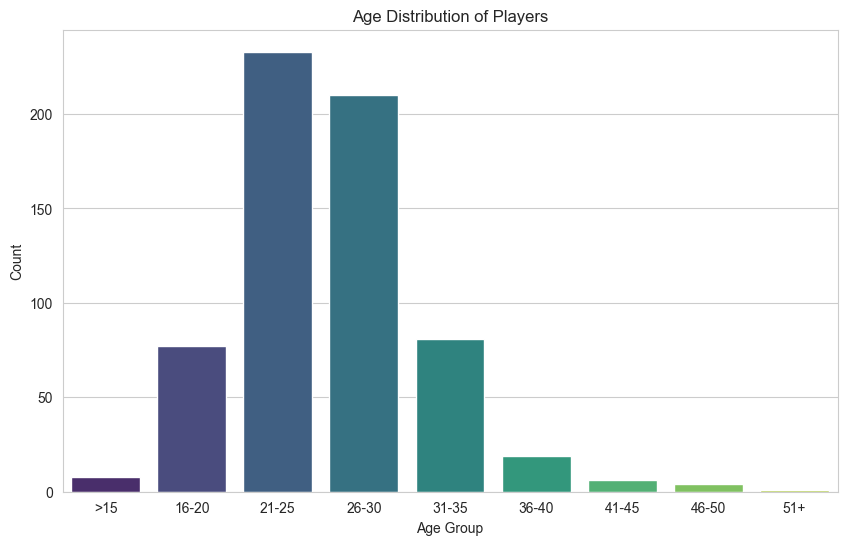

C:\Users\saadh\AppData\Local\Temp\ipykernel_16272\2735058372.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Age_Group'], bins=10, kde=True, palette='viridis')


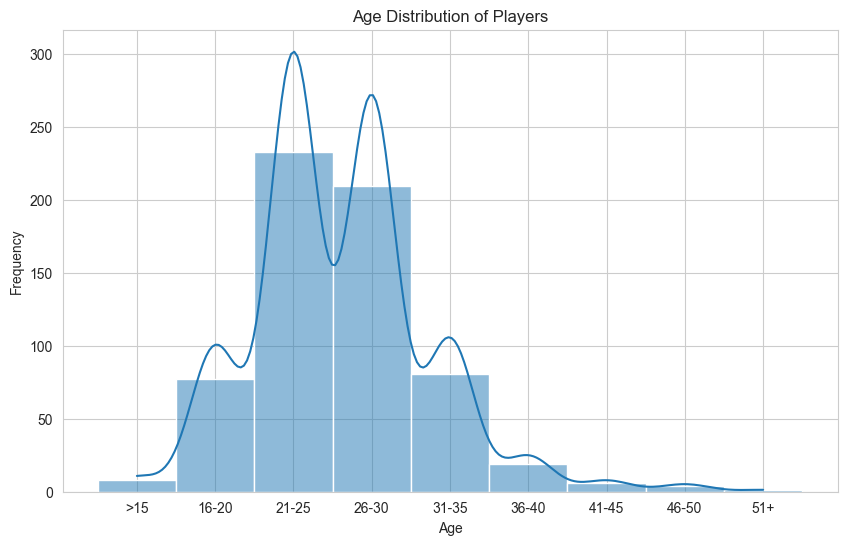

In [42]:
# Define age groups
age_bins = [11, 15, 20, 25, 30, 35, 40, 45, 50, 55]  
age_labels = ['>15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51+']


# Create a new column with age groups
df['Age_Group'] = pd.cut(df['A5'], bins=age_bins, labels=age_labels, right=True)

# Plot age distribution as a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', data=df, order=age_labels, palette='viridis')  # 'viridis' is just an example colormap, customize as needed
plt.title('Age Distribution of Players')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age_Group'], bins=10, kde=True, palette='viridis')
xticks_values = range(0, int(max(df['A5'])) + 1, 5)  # Convert float to int

plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## A(2) The relationship between the biological sex as defined by the dataset and the players’ environmental perception.

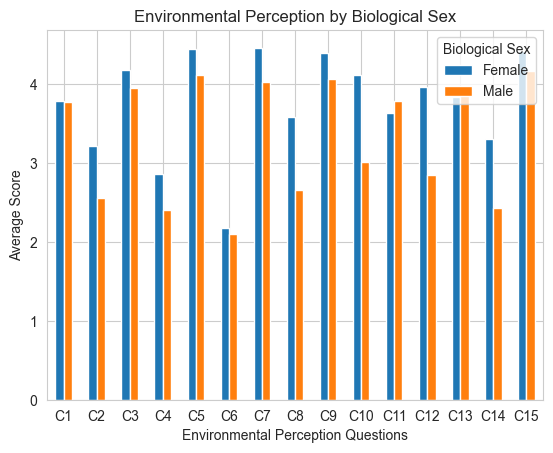

In [43]:
environmental_perception_grouped = player_df.groupby('A2')[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']].mean()

# Plotting the results
environmental_perception_grouped.T.plot(kind='bar', rot=0)
plt.title('Environmental Perception by Biological Sex')
plt.xlabel('Environmental Perception Questions')
plt.ylabel('Average Score')
plt.legend(title='Biological Sex')
plt.show()

  0%|          | 0/16 [00:00<?, ?it/s]

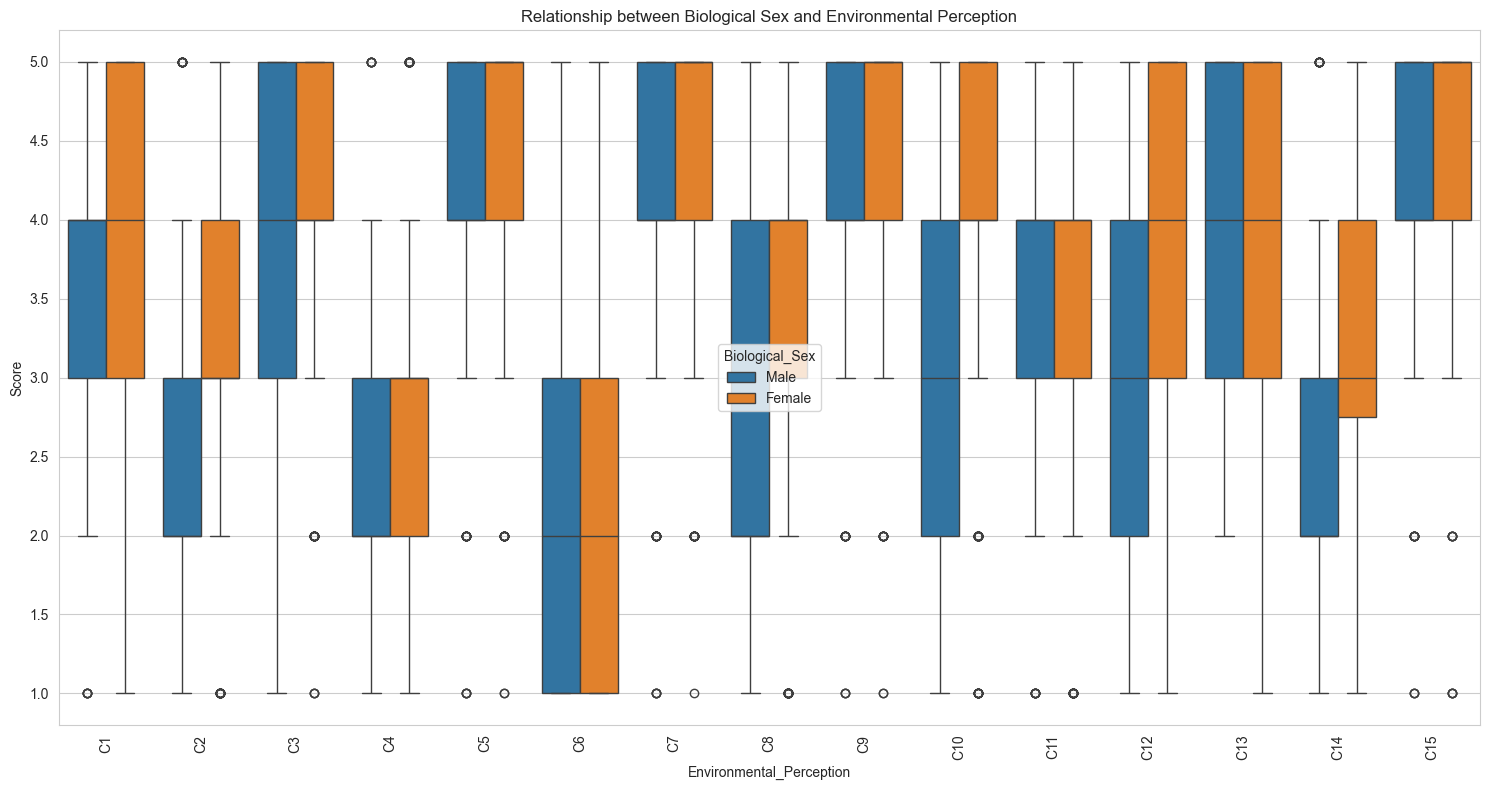

In [44]:
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

tqdm.pandas()
sns.set_style('whitegrid')

# Assuming relevant_columns and player_df are defined elsewhere
relevant_columns = ['A2'] + ['C' + str(i) for i in range(1, 16)]
filtered_df = df[relevant_columns].progress_apply(lambda x: x)

# Rename 'A2' to 'Biological_Sex' for clarity
filtered_df = filtered_df.rename(columns={'A2': 'Biological_Sex'})

# Melt the dataframe to have a single column for environmental perception variables
melted_df = filtered_df.melt(id_vars=['Biological_Sex'], var_name='Environmental_Perception', value_name='Score')

# Plot the relationship using a boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Environmental_Perception', y='Score', hue='Biological_Sex', data=melted_df)
plt.xticks(rotation=90)
plt.title('Relationship between Biological Sex and Environmental Perception')
plt.tight_layout()
plt.show()




###  Comparison of Frequency of Male and Female Players' In-Game Behavior: Cutting Down the Tree

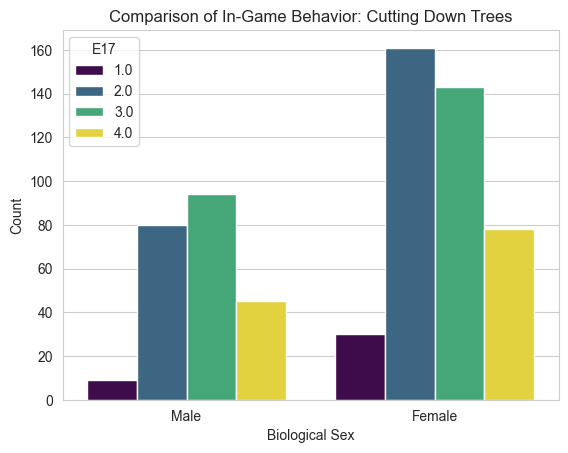

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [45]:
# Plot bar chart for comparison
sns.countplot(x='A2', hue='E17', data=df, palette='viridis')  # Replace '...' and 'Cutting_Down_Trees_Column' with appropriate columns
plt.xlabel('Biological Sex')
plt.ylabel('Count')
plt.title('Comparison of In-Game Behavior: Cutting Down Trees')
plt.show()

plt.figure(figsize=(10, 8))





In [46]:
df['A6'].unique()

array(['Asian', 'White', 'Hispanic or Latino', 'Other',
       'Pacific Islander', 'Black or African American',
       'Native American or American Indian'], dtype=object)

### b) Identification of Important Socio-Demographic Variables:
#### Correlation Analysis:

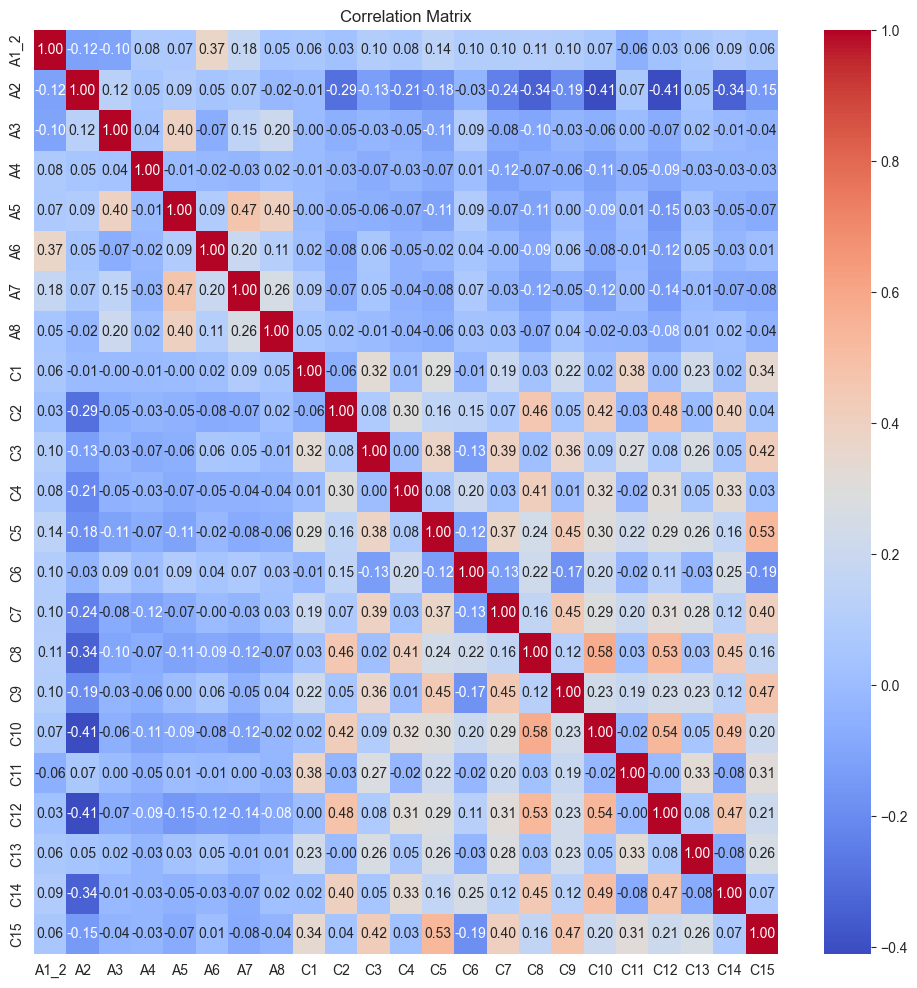

Feature Importance: [0.07488725 0.04486962 0.11630252 0.10920915 0.36842922 0.08488585
 0.06225658 0.1391598 ]


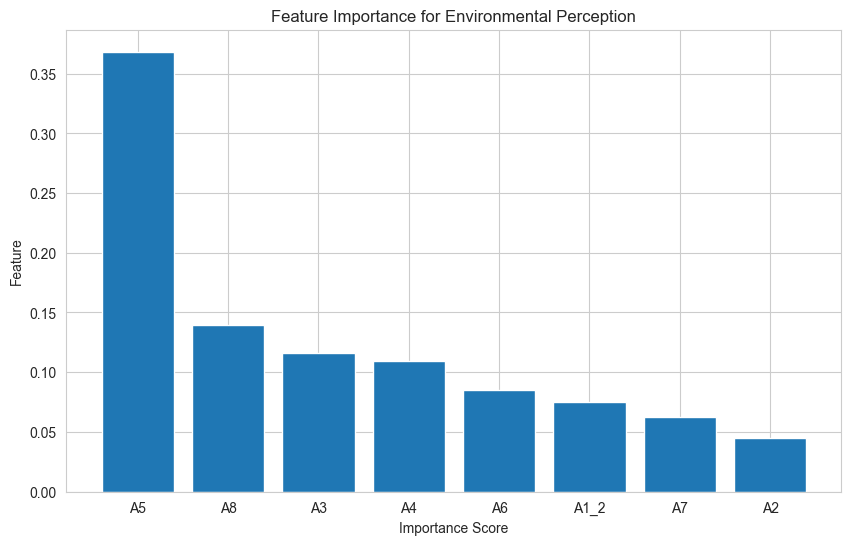

,Feature,Importance
4,A5,0.368429
7,A8,0.139160
2,A3,0.116303
3,A4,0.109209
5,A6,0.084886
0,A1_2,0.074887
6,A7,0.062257
1,A2,0.044870


In [47]:
category_mapping_A1_2 = {'Asia': 1, 'US/Canada': 2, 'EU': 3, 'Other': 4}
category_mapping_A2 = {'Female': 1, 'Male': 2}
category_mapping_A3 = {'Secondary school': 1, 'High school': 2, 'Primary school': 3, 'Undergraduate school': 4, 'Graduate school and higher':5}
category_mapping_A4 = {'A pet': 1, 'Both': 2, 'A garden': 3}
category_mapping_A6 = {'Asian': 1, 'White': 2, 'Hispanic or Latino': 3, 'Pacific Islander': 4, 'Black or African American':5, 'Native American or American Indian':6, 'Other':7}
category_mapping_A7 = {'Single, never married': 1, 'Married or domestic partnership': 2, 'Separated': 3, 'Divorced': 4, 'Widowed':5}
category_mapping_A8 = {'A student': 1, 'Out of work and looking for work': 2, 'Unable to work': 3, 'Employed for wages': 4, 'Retired':5, 'Out of work but not currently looking for work':6, 'Military':7, 'Self-employed':8, 'A homemaker':9}


# Map the 'Category' column using the defined mapping
df['A2'] = df['A2'].map(category_mapping_A2)
df['A1_2'] = df['A1_2'].map(category_mapping_A1_2)
df['A3'] = df['A3'].map(category_mapping_A3)
df['A4'] = df['A4'].map(category_mapping_A4)
df['A6'] = df['A6'].map(category_mapping_A6)
df['A7'] = df['A7'].map(category_mapping_A7)
df['A8'] = df['A8'].map(category_mapping_A8)


# Assuming 'socio_demo_vars' is a list of socio-demographic variables and 'env_perception' is the target variable
env_perception = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']
socio_demo_vars = ['A1_2', 'A2', 'A3', 'A4','A5', 'A6', 'A7', 'A8']
correlations_matrix = df[socio_demo_vars + env_perception].corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(correlations_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()









from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Assuming socio-demographic variables are X and target variable is 'Environmental_Perception'
X = df[['A1_2', 'A2', 'A3', 'A4','A5', 'A6', 'A7', 'A8']]
y = df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance for Environmental Perception')
plt.show()


feature_importance_df




Certainly, you can use a correlation matrix to identify the most important socio-demographic variables in relation to the environmental perception of the players. Here's a step-by-step guide:

In this heatmap:

- Darker colors represent stronger correlations, whether positive or negative.
- Values close to 1 indicate a strong positive correlation, while values close to -1 indicate a strong negative correlation.

### Interpretation:

- Look for socio-demographic variables that have higher absolute correlation coefficients with environmental perception variables.
- Positive correlations suggest a positive relationship, while negative correlations suggest an inverse relationship.

### Motivation for Using Correlation Matrix:

- **Identify Associations:** Correlation matrices help identify associations between variables. Variables strongly correlated with environmental perception may be considered important.
  
- **Visual Interpretation:** Heatmaps provide a visual way to interpret relationships, making it easier to spot patterns.

- **Quick Assessment:** Correlation matrices provide a quick way to assess relationships, especially when dealing with a moderate-sized number of variables.

Remember, correlation does not imply causation, but it can guide further exploration and analysis. Adjust the code according to your specific variable names and dataset.

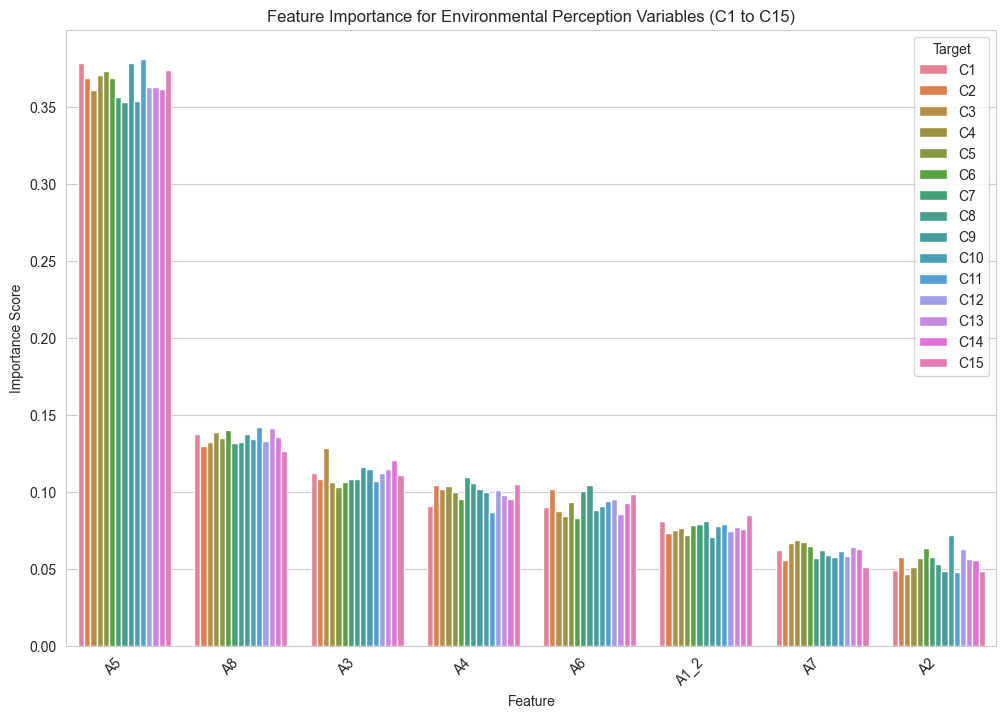

,Feature,Importance,Target
0,A5,0.378593,C1
1,A8,0.137465,C1
2,A3,0.112097,C1
3,A4,0.090465,C1
4,A6,0.089912,C1
...,...,...,...
115,A4,0.105213,C15
116,A6,0.098777,C15
117,A1_2,0.085084,C15
118,A7,0.051444,C15


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assuming socio-demographic variables are X and environmental perception variables are C1 to C15
X = df[['A1_2', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']]
y = df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a RandomForestClassifier as a MultiOutputClassifier
model = MultiOutputClassifier(RandomForestClassifier())
model.fit(X_train, y_train)

# Get feature importances
feature_importances = [estimator.feature_importances_ for estimator in model.estimators_]

# Create a DataFrame to store feature names and their importance scores for each target
feature_importance_dfs = []
for i, target_column in enumerate(y.columns):
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances[i]}).sort_values(by='Importance', ascending=False)
    feature_importance_df['Target'] = target_column
    feature_importance_dfs.append(feature_importance_df)

# Concatenate individual DataFrames into one
feature_importance_df = pd.concat(feature_importance_dfs, ignore_index=True)

# Plot the feature importance for each target variable
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', hue='Target', data=feature_importance_df)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance for Environmental Perception Variables (C1 to C15)')
plt.xticks(rotation=45, ha='right')
plt.show()
feature_importance_df

## C Develop a classification model that can be used to predict a player’s environmental perception based on socio-demographic variables

# Classification Model Development for Environmental Perception Prediction

## Data Preparation

### 1. Load the dataset:
   - Load the dataset and select socio-demographic variables (prefixed with 'A') as features.
   - Select environmental perception variables (prefixed with 'C') as the target.

### 2. Clean the data:
   - Handle missing values, encode categorical variables, etc.

### 3. Split the dataset:
   - Split the dataset into training (70%), test (15%), and evaluation (15%) sets.

## Model Training

### 1. Use RandomForestClassifier as the base estimator:
   - Wrap it with MultiOutputClassifier to handle multiple target variables.
   - Train the model on the training set.

## Model Evaluation

### 1. Predict on the test set:
   - Calculate and report the accuracy and other relevant metrics.

### 2. Use the evaluation set:
   - Further assess the model's performance.

## Motivation

- RandomForest is chosen for its robustness and ability to handle non-linear relationships.
- It performs well with a mix of categorical and numerical data.
- MultiOutputClassifier is used to extend RandomForest for multi-target classification.


In [49]:
csv_data = pd.read_csv('data_640_validated.csv', encoding='latin1')
socio_demographic_cols = [col for col in csv_data.columns if col.startswith('A')]
environmental_perception_cols = [col for col in csv_data.columns if col.startswith('C')]

# Select only the relevant columns for the classification task
classification_data = csv_data[socio_demographic_cols + environmental_perception_cols]

# Check for missing values
missing_values = classification_data.isnull().sum()

# Output the relevant columns and missing values
print('Socio-demographic columns:', socio_demographic_cols)
print('Environmental perception columns:', environmental_perception_cols)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
classification_data_copy = classification_data.copy()

# Encode categorical variables
label_encoders = {}
for column in socio_demographic_cols:
    label_encoders[column] = LabelEncoder()
    classification_data_copy.loc[:, column] = label_encoders[column].fit_transform(classification_data_copy.loc[:, column])

# Define the features and target
X = classification_data_copy[socio_demographic_cols]
y = classification_data_copy[environmental_perception_cols]

# Split the dataset into training (70%), test (15%), and evaluation (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Output the shape of the splits
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)
print('Evaluation set:', X_eval.shape, y_eval.shape)
features = csv_data.filter(regex='^A')
targets = csv_data.filter(regex='^C')

Socio-demographic columns: ['A1_1', 'A1_2', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']
Environmental perception columns: ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']
Training set: (448, 9) (448, 15)
Test set: (96, 9) (96, 15)
Evaluation set: (96, 9) (96, 15)


# Dataset Split Information

The dataset has been split into training, test, and evaluation sets with the following number of samples:

- Training set: 448 samples
- Test set: 96 samples
- Evaluation set: 96 samples


# Task Execution Plan

To proceed with the task using RandomForestClassifier with MultiOutputClassifier, I will:

1. **Convert the average of the environmental perception variables into discrete class labels:**
   - Define a threshold to categorize the average.

2. **Train the RandomForestClassifier wrapped in a MultiOutputClassifier:**
   - Use the training set for model training.

3. **Evaluate the model's performance:**
   - Assess the model on the test and evaluation sets.
   - Use accuracy as the metric.


In [50]:
# Define a threshold to convert the average target into discrete class labels
average_target = targets.mean(axis=1)
threshold = average_target.median()
class_labels = (average_target > threshold).astype(int)

# Update the target in the training, test, and evaluation sets
y_train_labels = class_labels.iloc[y_train.index]
y_test_labels = class_labels.iloc[y_test.index]
y_eval_labels = class_labels.iloc[y_eval.index]

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Wrap the RandomForestClassifier with MultiOutputClassifier
# Since we now have a single target, we need to reshape it to use MultiOutputClassifier
multi_target_rf = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# Fit the model on the training data
# Reshape the target to be 2D
multi_target_rf.fit(X_train, y_train_labels.values.reshape(-1, 1))

# Predict on the test set
y_pred_test_labels = multi_target_rf.predict(X_test)

# Calculate accuracy on the test set
accuracy_test_labels = accuracy_score(y_test_labels, y_pred_test_labels)

# Output the accuracy
print('Accuracy on the test set:', accuracy_test_labels)

Accuracy on the test set: 0.71875


## Accuracy on the test set:
0.71875

The `RandomForestClassifier` with `MultiOutputClassifier`, after converting the average to discrete class labels using a median threshold, achieved an accuracy of approximately 71.88% on the test set. This indicates a significant improvement in the model's ability to predict the class labels for the environmental perception based on socio-demographic variables.
